In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf7a33ed04b474ee0d19ed1cace7bd5c


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tocopilla
Processing Record 2 of Set 1 | sao miguel do araguaia
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | utiroa
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | asau
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | launceston
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | goderich
Processing Record 19 of Set 1 | gangotri
City not found. Skipping...
Processing Record 20 of Set 1 | seymchan
Processing Record 21 of Set 1 | vaini


Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | svetlyy
Processing Record 40 of Set 4 | coracora
Processing Record 41 of Set 4 | thyolo
Processing Record 42 of Set 4 | kloulklubed
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | okhotsk
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | san martin
Processing Record 47 of Set 4 | ojinaga
Processing Record 48 of Set 4 | nador
Processing Record 49 of Set 4 | buala
Processing Record 50 of Set 4 | tanete
Processing Record 1 of Set 5 | ketchikan
Processing Record 2 of Set 5 | tarko-sale
Processing Record 3 of Set 5 | hobart
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | kizhinga
Processing Record 6 of Set 5 | toora-khem
Processing Record 7 of Set 5 | crab hill
City not found. Skipping...
Processing Record 8 of Set 5 | estelle
Processing Record 9 of Set 5 | praia
Processing Record 10 of Set 5 | kralendijk
Processing Record 11 of Set 5

Processing Record 27 of Set 8 | half moon bay
Processing Record 28 of Set 8 | nelson bay
Processing Record 29 of Set 8 | redding
Processing Record 30 of Set 8 | yuli
Processing Record 31 of Set 8 | mikhaylovka
Processing Record 32 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | sao jose da coroa grande
Processing Record 36 of Set 8 | sanwer
Processing Record 37 of Set 8 | meyungs
City not found. Skipping...
Processing Record 38 of Set 8 | longyearbyen
Processing Record 39 of Set 8 | port blair
Processing Record 40 of Set 8 | agadez
Processing Record 41 of Set 8 | maragogi
Processing Record 42 of Set 8 | hervey bay
Processing Record 43 of Set 8 | amderma
City not found. Skipping...
Processing Record 44 of Set 8 | namatanai
Processing Record 45 of Set 8 | de aar
Processing Record 46 of Set 8 | rauma
Processing Record 47 of Set 8 | pangkalanbuun
Processing Record 48 of Set 8 | 

Processing Record 7 of Set 12 | mehamn
Processing Record 8 of Set 12 | mahibadhoo
Processing Record 9 of Set 12 | la troncal
Processing Record 10 of Set 12 | nanortalik
Processing Record 11 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 12 of Set 12 | shakawe
Processing Record 13 of Set 12 | san patricio
Processing Record 14 of Set 12 | kouqian
Processing Record 15 of Set 12 | deyang
Processing Record 16 of Set 12 | miyako
Processing Record 17 of Set 12 | banda aceh
Processing Record 18 of Set 12 | san carlos de bariloche
Processing Record 19 of Set 12 | zheleznodorozhnyy
Processing Record 20 of Set 12 | noshiro
Processing Record 21 of Set 12 | behshahr
Processing Record 22 of Set 12 | jalu
Processing Record 23 of Set 12 | xining
Processing Record 24 of Set 12 | praia da vitoria
Processing Record 25 of Set 12 | falealupo
City not found. Skipping...
Processing Record 26 of Set 12 | veseloyarsk
Processing Record 27 of Set 12 | lazaro cardenas
Processing Record 28 of S

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tocopilla,-22.0920,-70.1979,64.72,72,93,5.59,CL,2021-05-31 12:21:59
1,Sao Miguel Do Araguaia,-13.2750,-50.1628,81.00,44,30,3.78,BR,2021-05-31 12:22:00
2,Rikitea,-23.1203,-134.9692,74.59,63,67,10.22,PF,2021-05-31 12:22:00
3,Ixtapa,20.7000,-105.2000,73.22,83,20,0.00,MX,2021-05-31 12:22:00
4,Mataura,-46.1927,168.8643,49.48,95,100,2.26,NZ,2021-05-31 12:22:01
5,Victoria,22.2855,114.1577,87.39,84,100,8.01,HK,2021-05-31 12:18:00
6,Upernavik,72.7868,-56.1549,31.37,87,100,3.56,GL,2021-05-31 12:22:01
7,Rio Grande,-32.0350,-52.0986,46.51,62,5,10.09,BR,2021-05-31 12:22:01
8,Faanui,-16.4833,-151.7500,78.53,69,98,13.53,PF,2021-05-31 12:22:02
9,Busselton,-33.6500,115.3333,52.09,85,90,7.02,AU,2021-05-31 12:22:02


In [33]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tocopilla,CL,2021-05-31 12:21:59,-22.0920,-70.1979,64.72,72,93,5.59
1,Sao Miguel Do Araguaia,BR,2021-05-31 12:22:00,-13.2750,-50.1628,81.00,44,30,3.78
2,Rikitea,PF,2021-05-31 12:22:00,-23.1203,-134.9692,74.59,63,67,10.22
3,Ixtapa,MX,2021-05-31 12:22:00,20.7000,-105.2000,73.22,83,20,0.00
4,Mataura,NZ,2021-05-31 12:22:01,-46.1927,168.8643,49.48,95,100,2.26
5,Victoria,HK,2021-05-31 12:18:00,22.2855,114.1577,87.39,84,100,8.01
6,Upernavik,GL,2021-05-31 12:22:01,72.7868,-56.1549,31.37,87,100,3.56
7,Rio Grande,BR,2021-05-31 12:22:01,-32.0350,-52.0986,46.51,62,5,10.09
8,Faanui,PF,2021-05-31 12:22:02,-16.4833,-151.7500,78.53,69,98,13.53
9,Busselton,AU,2021-05-31 12:22:02,-33.6500,115.3333,52.09,85,90,7.02


In [34]:
# Create the output file (CSV).
output_data_file = "./weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622465180.189245

In [37]:
# Get today's date.
today = time.strftime("%x")
today

'05/31/21'

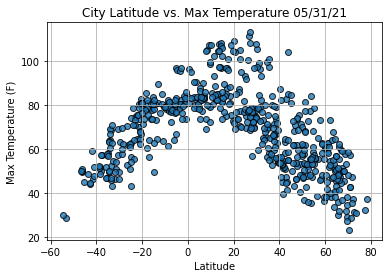

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

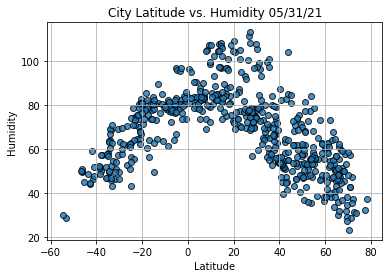

In [39]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

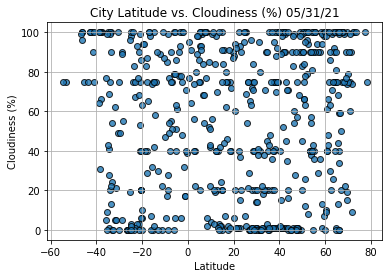

In [40]:
# Build the scatter plots for latitude vs. cloudiness.6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

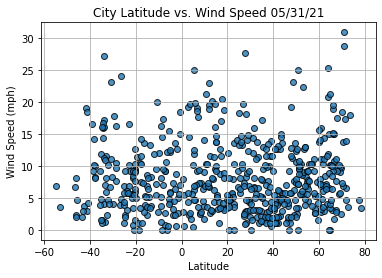

In [41]:
# Build the scatter plots for latitude vs. wind speed. 6.3.4
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


In [58]:
# Import linregress 6.4.2 - no output will be shown
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
index13 = city_data_df.loc[13]
index13

City                   Launceston
Country                        AU
Date          2021-05-31 12:22:04
Lat                        -41.45
Lng                       147.167
Max Temp                    46.15
Humidity                       90
Cloudiness                     90
Wind Speed                      3
Name: 13, dtype: object

In [60]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
564    False
565    False
566     True
567    False
568     True
Name: Lat, Length: 569, dtype: bool

In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Ixtapa,MX,2021-05-31 12:22:00,20.7000,-105.2000,73.22,83,20,0.00
5,Victoria,HK,2021-05-31 12:18:00,22.2855,114.1577,87.39,84,100,8.01
6,Upernavik,GL,2021-05-31 12:22:01,72.7868,-56.1549,31.37,87,100,3.56
10,Asau,RO,2021-05-31 12:22:03,46.4333,26.4000,61.75,66,99,1.54
12,Albany,US,2021-05-31 12:22:04,42.6001,-73.9662,50.81,92,100,4.36


In [62]:
# Create Northern and Southern Hemisphere DataFrames. 6.4.2
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tocopilla,CL,2021-05-31 12:21:59,-22.0920,-70.1979,64.72,72,93,5.59
1,Sao Miguel Do Araguaia,BR,2021-05-31 12:22:00,-13.2750,-50.1628,81.00,44,30,3.78
2,Rikitea,PF,2021-05-31 12:22:00,-23.1203,-134.9692,74.59,63,67,10.22
4,Mataura,NZ,2021-05-31 12:22:01,-46.1927,168.8643,49.48,95,100,2.26
7,Rio Grande,BR,2021-05-31 12:22:01,-32.0350,-52.0986,46.51,62,5,10.09


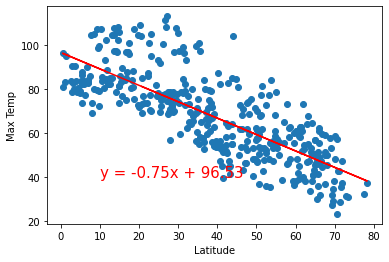

In [72]:
# Linear regression on the Northern Hemisphere   MISSING TITLES ON THESE - WHY???? 6.4.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \for Maximum Temperature', 'Max Temp',(10,40))


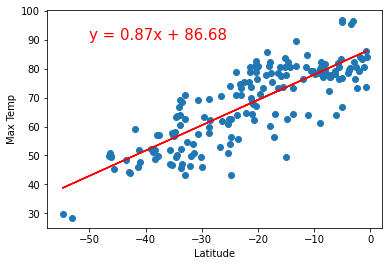

In [73]:
# Linear regression on the Southern Hemisphere 6.4.2 MISSING TITLES ON THESE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

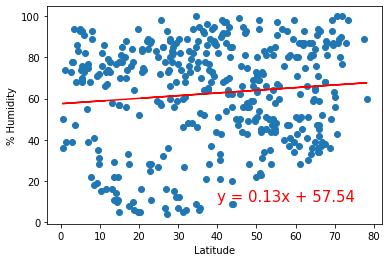

In [74]:
# Linear regression on the Northern Hemisphere 6.4.3 MISSING TITLES ON THESE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

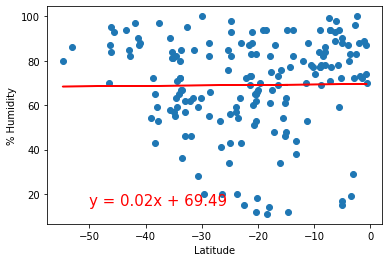

In [75]:
# Linear regression on the Southern Hemisphere 6.4.3 MISSING TITLES ON THESE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                       for % Humidity', '% Humidity',(-50,15))

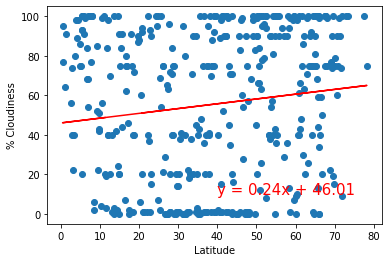

In [80]:
# Linear regression on the Northern Hemisphere 6.4.4 MISSING TITLES ON THESE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \for % Cloudiness', '% Cloudiness',(40,10))

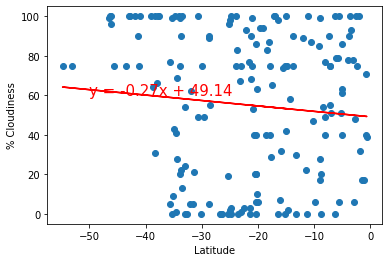

In [81]:
# Linear regression on the Southern Hemisphere 6.4.4 MISSING TITLES ON THESE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

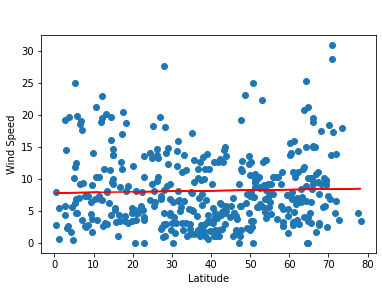

In [54]:
# Linear regression on the Northern Hemisphere 6.4.5 MISSING TITLES ON THESE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

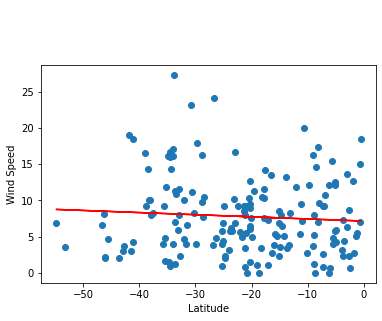

In [78]:
# Linear regression on the Southern Hemisphere 6.4.5 MISSING TITLES ON THESE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))